# 3 image method test with 3 image 1D FFT

## Packages

In [78]:
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import glob
import sys
import os

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant')

from scipy.interpolate import interpolate
from scipy.interpolate import RectBivariateSpline
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator

from spectral_analysis_functions import *
from spectral_analysis_functions_3img import *
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np
from S2_read import *
from s2_angs import *

## Image reading

In [107]:
# 27/04/2023

# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PYN_20160827T065722.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/S2A_MSIL1C_20230402T103621_N0509_R008_T31TFG_20230402T160048.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/S2A_MSIL1C_20230402T103621_N0509_R008_T31TEE_20230402T160048.SAFE/'
S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SCF_20230427T223909.SAFE/'

Sat='B'
# S2path='S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/'

bands=['B04','B08','B03','B02'];  


XML_File = find('MTD_TL.xml', S2path)
XML_File_DS=find('MTD_DS.xml',S2path)
if XML_File is None:
    print("Le fichier 'MTD_TL.xml' n'a pas été trouvé dans le répertoire spécifié:", S2path)
boxi1=[6800,7400,7000,7600] # East West South North : this box is covered by another detector
[imgs1,NX1,NY1,nx1,ny1,dx1,dy1,offspec1,phitrig1,thetav1,loncenter1,latcenter1,detector,indexX,indexY]=S2_read(S2path,boxi1,bands)
boxi=[2500,3000,4000,4500]

[imgs,NX,NY,nx,ny,dx,dy,offspec,phitrig,thetav,loncenter,latcenter,detector,indexX,indexY]=S2_read(S2path,boxi,bands)
 

test: /home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/
Reading XML file for view and sun angles: /home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/GRANULE/L1C_T10SBF_A032071_20230427T190624/MTD_TL.xml
Reading file for band  B04 : /home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/GRANULE/L1C_T10SBF_A032071_20230427T190624/IMG_DATA/T10SBF_20230427T185919_B04.jp2
Reading file for band  B08 : /home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/GRANULE/L1C_T10SBF_A032071_20230427T190624/IMG_DATA/T10SBF_20230427T185919_B08.jp2
Reading file for band  B03 : /home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/GRANULE/L1C_T10SBF_A032071_20230427T190624/IMG_DATA/T10SBF_20230427T185919_B03.jp2
Readin

## image based on detectors

IndexX et indexY: pixels; 
array1: image as a function of detectors

lon,lat: -126.03875583513762 36.40120164253024
means: [ 737.   677.   836.5 1009. ]
Median brighness in B04 and mss: 1474.0 0.0 0.0 0.0 4.584073337504239e-17 27.0311 16.435686365363242


/tmp/ipykernel_112918/4163147935.py:27: RuntimeWarning: divide by zero encountered in log
  mss=(np.tan(np.radians(offspec1[0]))**2-np.tan(np.radians(offspec[0]))**2)/np.log(ratio*Bd/Bd1)


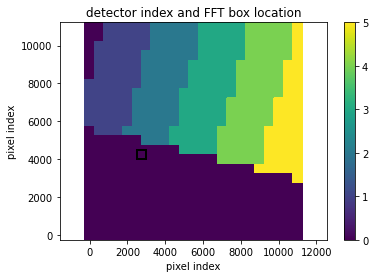

G4 -9.292970843455265
[2500, 3000, 4000, 4500]


In [108]:
print('lon,lat:',np.degrees(loncenter),np.degrees(latcenter))

nb=np.shape(bands)[0]
# Mother_box=[4800,10000,7200,10300]
Mother_box=[2000, 10000, 6000,10000]

taille_boite=500
width=(Mother_box[1] - Mother_box[0]) // taille_boite 
length=(Mother_box[3] - Mother_box[2]) // taille_boite 

# boxi=[6000, 6500, 8000, 8500]
# boxi=[7600,8100,4500,5000]
B04med1=np.median(imgs1[0,:,:].flatten())
B04med=np.median(imgs[0,:,:].flatten())
B08med1=np.median(imgs1[1,:,:].flatten())
B08med=np.median(imgs[1,:,:].flatten())

mediansb=0.5*(np.median(imgs,axis=(1, 2))+np.median(imgs1,axis=(1, 2)))
print('means:',mediansb)

ratio=B04med/B04med1
G4=(B04med-B04med1)/(tan(np.radians(offspec[0]))-tan(np.radians(offspec1[0])))/mediansb[0]
G8=(B08med-B08med1)/(tan(np.radians(offspec[1]))-tan(np.radians(offspec1[1])))/mediansb[1]
                         
Bd1=(np.cos(np.radians(offspec1[0])))**4*np.cos(np.radians(thetav1[0]))
Bd=(np.cos(np.radians(offspec[0])))**4*np.cos(np.radians(thetav[0]))
mss=(np.tan(np.radians(offspec1[0]))**2-np.tan(np.radians(offspec[0]))**2)/np.log(ratio*Bd/Bd1)

print('Median brighness in B04 and mss:',B04med1,B04med,mss,ratio,Bd/Bd1,offspec[0],offspec1[0])
array1=np.squeeze(detector[1,:,:])
fig, ax = plt.subplots() 
im=ax.pcolor(indexX,indexY,array1)
fig.colorbar(im)
ax.set_title('detector index and FFT box location')
ax.set_xlabel('pixel index')
ax.set_ylabel('pixel index')
ax.axis('equal')
rect = mp.patches.Rectangle((boxi[0], boxi[2]), boxi[1]-boxi[0], boxi[3]-boxi[2], linewidth=2,
                         edgecolor='k', facecolor="none")
# rect1 = mp.patches.Rectangle((Mother_box[0], Mother_box[2]), Mother_box[1]-Mother_box[0], Mother_box[3]-boxi1[2], linewidth=2,
#                          edgecolor='r', facecolor="none")
# ax.add_patch(rect1)

ax.add_patch(rect)
plt.show()
print('G4',G4)
print(boxi)

## Calculation of dt

#### Identifying the detector

In [95]:
# On determine le centre de la boîte en pixel
def centre_carre(x0,xy0,taille_boite):
    centrex=x0+taille_boite/2
    centrey=y0+taille_boite/2
    return centrex, centrey

x0=boxi[0]
y0=boxi[2]
cote=boxi[1]-boxi[0]
centre=centre_carre(x0,y0,cote)
centre = (int(centre[0]), int(centre[1]))
print('centre',centre)

centre (2750, 4250)


In [96]:
loncenter=loncenter*180/(math.pi)
latcenter=latcenter*180/(math.pi)


In [97]:
# print('indexX',indexX)
indexX2, indexY2 = np.meshgrid(indexX, indexY)
print('shape indexX',np.shape(indexX))
print('shape indexY',np.shape(indexY))
print('shape array1',np.shape(array1))


# Aplatir les grilles et les valeurs pour utiliser dans griddata
points = np.column_stack((indexX.ravel(), indexY.ravel()))
values = array1.ravel()

# Interpolation
value = griddata(points, values, centre, method='linear')
value = value.item()  # Extraire la valeur si c'est un tableau 1D avec un seul élément
print(np.round(value))

shape indexX (23, 23)
shape indexY (23, 23)
shape array1 (23, 23)
6.0


In [98]:
mapping = {
    1: 'D01',
    2: 'D02',
    3: 'D03',
    4: 'D04',
    5: 'D05',
    6: 'D06',
    7: 'D07',
    8: 'D08',
    9: 'D09',
    10: 'D10',
    11: 'D11',
    12: 'D12'
}
if np.round(value) in mapping:
    Det = mapping[np.round(value)]
else:
    # Si la valeur arrondie n'est pas dans le dictionnaire, attribuez une valeur par défaut ou gérez l'erreur selon votre cas d'utilisation
    Det = "Valeur non trouvée"
print(Det)

D06


In [99]:
datastrip_dir = os.path.join(S2path, "DATASTRIP")

# Liste des éléments dans le répertoire DATASTRIP
datastrip_contents = os.listdir(datastrip_dir)

# Filtrer les répertoires dans datastrip_contents
directories = [item for item in datastrip_contents if os.path.isdir(os.path.join(datastrip_dir, item))]

# Vérifier qu'il y a exactement un répertoire dans DATASTRIP
if len(directories) == 1:
    # Si un seul répertoire est présent, construire le chemin vers MTD_DS.xml
    xml_path = os.path.join(datastrip_dir, directories[0], "MTD_DS.xml")
    print(xml_path)
else:
    print("Il n'y a pas exactement un seul répertoire dans DATASTRIP.")

/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SCF_20230427T223909.SAFE/DATASTRIP/DS_2BPS_20230427T223909_S20230427T190624/MTD_DS.xml


In [100]:
dt1=!python main_computeDT.py -lon {loncenter} -lat {latcenter} -src B2 -dst B4 -det {Det} -sat {Sat} -eph {xml_path}
print('dt1=',dt1[0])

dt2=!python main_computeDT.py -lon {loncenter} -lat {latcenter} -src B2 -dst B3 -det {Det} -sat {Sat} -eph {xml_path}
print('dt2=',dt2[0])

dt3=!python main_computeDT.py -lon {loncenter} -lat {latcenter} -src B3 -dst B4 -det {Det} -sat {Sat} -eph {xml_path}
print('dt3=',dt3[0])


dt1= -0.9955444441653334
dt2= -0.5170991200076791
dt3= -0.4784450110695932


### FFT 3 images B04 B03 B02

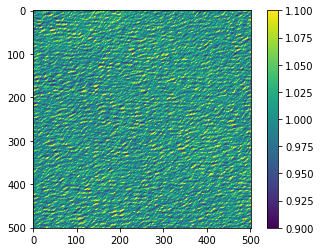

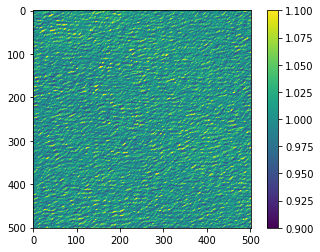

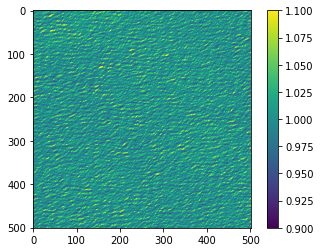

In [101]:
# normalizes the image values
img1=imgs[0,:,:]/np.median(imgs[0,:,:].flatten()) #B4
img2=imgs[2,:,:]/np.median(imgs[2,:,:].flatten()) #B3
img3=imgs[3,:,:]/np.median(imgs[3,:,:].flatten()) #B2


tb4=0
tb3 = tb4 + float(dt3[0])
tb2 = tb4 + float(dt1[0])  

imgtimes = np.array([tb4, tb3, tb2])


plt.imshow(np.flipud(np.transpose(img1)),vmin=0.9, vmax=1.1) #edit your vmin, vmax and cmap if you don't like greyscale colormap
plt.colorbar()
plt.show()

plt.imshow(np.flipud(np.transpose(img2)),vmin=0.9, vmax=1.1) #edit your vmin, vmax and cmap if you don't like greyscale colormap
plt.colorbar()
plt.show()

plt.imshow(np.flipud(np.transpose(img3)),vmin=0.9, vmax=1.1) #edit your vmin, vmax and cmap if you don't like greyscale colormap
plt.colorbar()
plt.show()

# Fourier transform with 3 images and Least-square

Not sure that is working well...

In [103]:
Umin=-5
Umax=5
ntile=8
std1=np.nanstd(img1.flatten())
std2=np.nanstd(img2.flatten())
std3=np.nanstd(img3.flatten())
mean1=np.nanmean(img1.flatten())
mean2=np.nanmean(img2.flatten())
mean3=np.nanmean(img3.flatten())


(E1, E2, E3, U, U2, Uall, EA, EB, nU, coh12, coh23, coh31, ang12, ang23, ang31, kxs, kys, angstd, phases, eps2s) = FFT2D3((img1-mean1)/std1, (img2-mean2)/std2, (img3-mean3)/std3, imgtimes, nx, ny, dx, dy, ntile, Umin, Umax)


nx 501 8 62
ny 501 8 62
npixel 3844


/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/spectral_analysis_functions_3img.py:435: RuntimeWarning: invalid value encountered in divide
  EA /= nU
/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/spectral_analysis_functions_3img.py:436: RuntimeWarning: invalid value encountered in divide
  EB /= nU


In [104]:
print(np.shape(E1))
print(np.shape(kxs))
print(np.shape(kys))
print('U med',np.shape(U))
phiblind1=phitrig[0]+90.  # blind azimuth for first band
phiblind2=phitrig[1]+90.  # blind azimuth for 3rd band
phiblind3=phitrig[2]+90.  # blind azimuth for 3rd band
kN=50
xkblind=[-1.4*kN*np.sin(np.radians(phiblind2)) , 1.4*kN*np.sin(np.radians(phiblind2))]
ykblind=[-1.4*kN*np.cos(np.radians(phiblind2)) , 1.4*kN*np.cos(np.radians(phiblind2))]

X = np.arange(0,nx*dx,dx) # from 0 to (nx-1)*dx with a dx step
Y = np.arange(0,ny*dy,dy)


(62, 62)
(62,)
(62,)
U med (62, 62)


### Plot  figures from the fourier transform

variance 1: 0.0024770439625484194 sum of spectrum: 0.9972663280473786
variance 2: 0.0016067791152914982 sum of spectrum: 0.99713626824944
variance 3: 0.0010419812533482824 sum of spectrum: 0.998628589637321


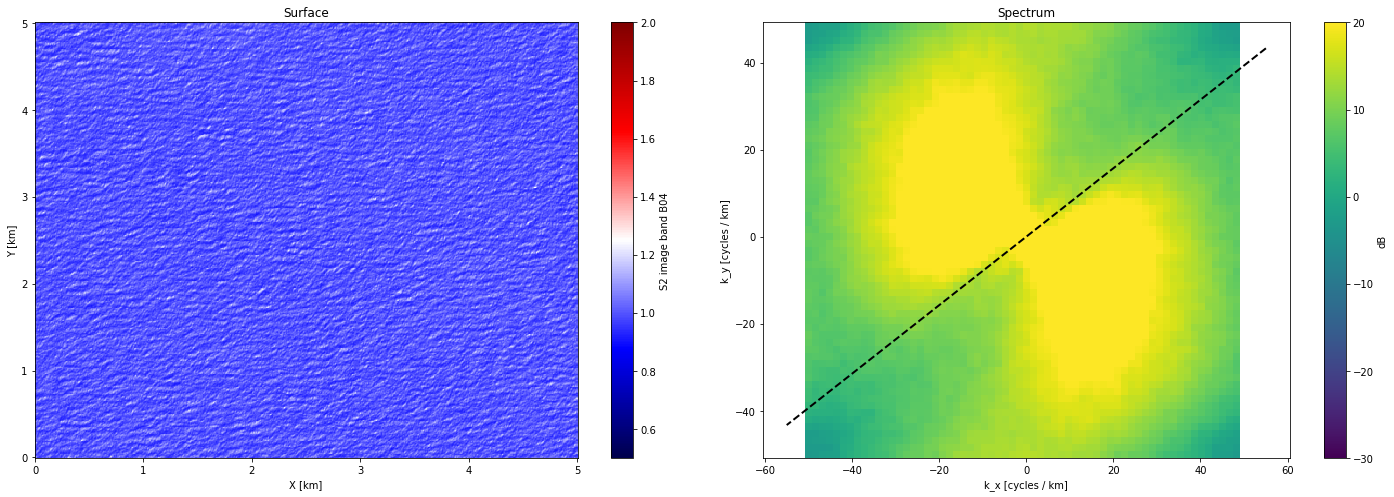

In [105]:
fig,axs=plt.subplots(1,2,figsize=(20,7))#,sharey=True,sharex=True)
_=plt.gca().set_aspect('equal', adjustable='box')

# warning: we use an array img1 that is written with X in the first (number 0) dimension and Y in the second
#          but pcolormesh uses the opposite order: hence the use of transpose 

im=axs[0].pcolormesh(X/1000,Y/1000,np.transpose(img2),cmap='seismic',norm = mcolors.Normalize(vmin=0.5, vmax=2))
_=plt.colorbar(im,ax=axs[0],label='S2 image band B04')
_=axs[0].set_xlabel('X [km]')
_=axs[0].set_ylabel('Y [km]')
_=axs[0].set_title('Surface')

im=axs[1].pcolormesh(kxs*1000,kys*1000,10*np.log10((E2)),norm = mcolors.Normalize(vmin=-30, vmax=20))
_=plt.colorbar(im,ax=axs[1],label='dB')
_=plt.plot(xkblind,ykblind,color='k',linestyle='--',linewidth=2)
_=axs[1].set_xlabel('k_x [cycles / km]')
_=axs[1].set_ylabel('k_y [cycles / km]')
_=axs[1].set_title('Spectrum')
_=plt.tight_layout()

dkx=kxs[1]-kxs[0]
dky=kys[1]-kys[0]
print('variance 1:',np.var(img1.flatten()), 'sum of spectrum:',np.sum(E1.flatten())*dkx*dky )
print('variance 2:',np.var(img2.flatten()), 'sum of spectrum:',np.sum(E2.flatten())*dkx*dky )
print('variance 3:',np.var(img3.flatten()), 'sum of spectrum:',np.sum(E3.flatten())*dkx*dky )


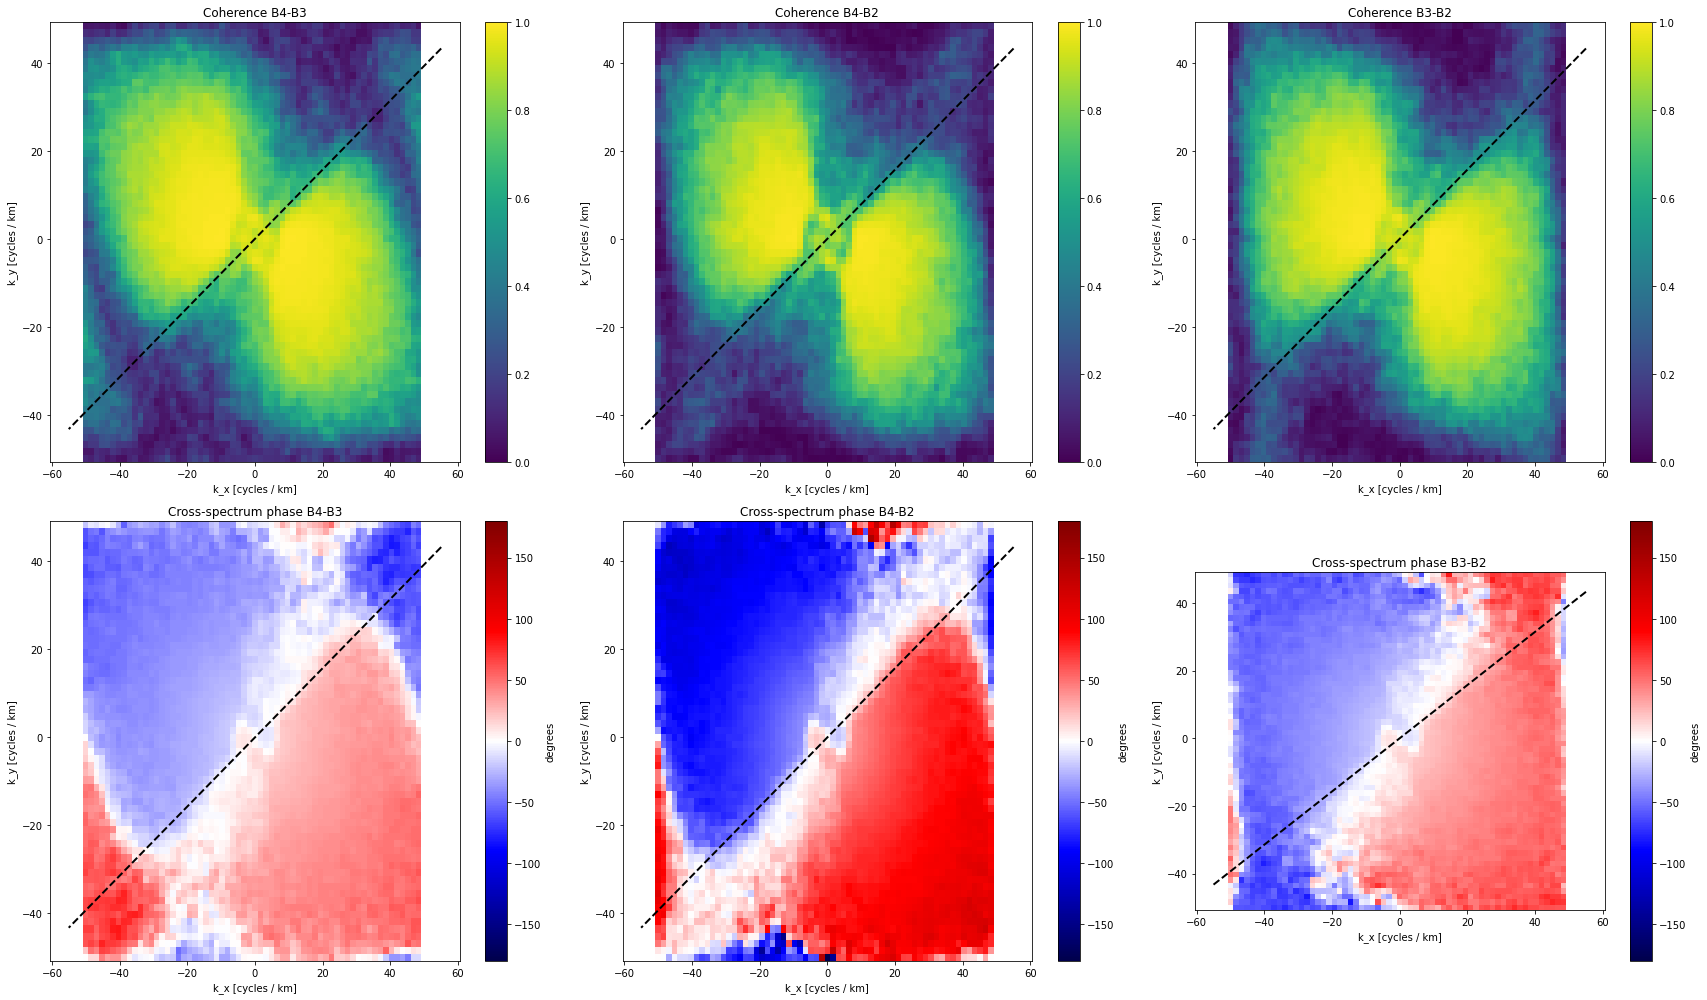

In [106]:
fig, axs = plt.subplots(2, 3, figsize=(24, 14))#,sharey=True,sharex=True)
plt.gca().set_aspect('equal', adjustable='box')

# Plot coherence between img1 and img2
im = axs[0, 0].pcolormesh(kxs*1000, kys*1000, coh12, norm=mcolors.Normalize(vmin=0, vmax=1))
plt.colorbar(im, ax=axs[0, 0], label=' ')
axs[0, 0].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[0, 0].set_xlabel('k_x [cycles / km]')
axs[0, 0].set_ylabel('k_y [cycles / km]')
axs[0, 0].set_title('Coherence B4-B3')

# Plot coherence between img1 and img3
im = axs[0, 1].pcolormesh(kxs*1000, kys*1000, coh31, norm=mcolors.Normalize(vmin=0, vmax=1))
plt.colorbar(im, ax=axs[0, 1], label=' ')
axs[0, 1].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[0, 1].set_xlabel('k_x [cycles / km]')
axs[0, 1].set_ylabel('k_y [cycles / km]')
axs[0, 1].set_title('Coherence B4-B2')

# Plot coherence between img2 and img3
im = axs[0, 2].pcolormesh(kxs*1000, kys*1000, coh23, norm=mcolors.Normalize(vmin=0, vmax=1))
plt.colorbar(im, ax=axs[0, 2], label=' ')
axs[0, 2].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[0, 2].set_xlabel('k_x [cycles / km]')
axs[0, 2].set_ylabel('k_y [cycles / km]')
axs[0, 2].set_title('Coherence B3-B2')

# Plot phase cross-spectrum between img1 and img2
im = axs[1, 0].pcolormesh(kxs*1000, kys*1000, np.degrees(ang12), cmap='seismic', norm=mcolors.Normalize(vmin=-180, vmax=180))
plt.colorbar(im, ax=axs[1, 0], label='degrees')
axs[1, 0].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[1, 0].set_xlabel('k_x [cycles / km]')
axs[1, 0].set_ylabel('k_y [cycles / km]')
axs[1, 0].set_title('Cross-spectrum phase B4-B3')

# Plot phase cross-spectrum between img1 and img3
im = axs[1, 1].pcolormesh(kxs*1000, kys*1000, np.degrees(ang31), cmap='seismic', norm=mcolors.Normalize(vmin=-180, vmax=180))
plt.colorbar(im, ax=axs[1, 1], label='degrees')
axs[1, 1].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[1, 1].set_xlabel('k_x [cycles / km]')
axs[1, 1].set_ylabel('k_y [cycles / km]')
axs[1, 1].set_title('Cross-spectrum phase B4-B2')

# Plot phase cross-spectrum between img2 and img3
im = axs[1, 2].pcolormesh(kxs*1000, kys*1000, np.degrees(ang23), cmap='seismic', norm=mcolors.Normalize(vmin=-180, vmax=180))
plt.colorbar(im, ax=axs[1, 2], label='degrees')
axs[1, 2].plot(xkblind, ykblind, color='k', linestyle='--', linewidth=2)
axs[1, 2].set_xlabel('k_x [cycles / km]')
axs[1, 2].set_ylabel('k_y [cycles / km]')
axs[1, 2].set_title('Cross-spectrum phase B3-B2')

plt.tight_layout()


## Analyze phase speed and presence of reflextion in sequence of 3 images

In [85]:
dirC2=-25
dirC1=-50 # à modifier ultérieurement

curmax=1.5 # for plots

nkx=len(kxs)
nky=len(kys)

kxs2 = np.tile(kxs[:, np.newaxis], (1, nky))
kys2 = np.tile(kys[np.newaxis, :], (nkx, 1))
dir2a=np.degrees(np.arctan2(kxs2,kys2))

kn=np.sqrt(kxs2**2+kys2**2)*(2*np.pi)+1E-20
kncpk=kn/(2*np.pi)*1000
dt=imgtimes[2]-imgtimes[0] # Pour l'instant on fait comme ça

# print('angstd',np.degrees(angstd)<60)
# indices = np.where(np.degrees(angstd) < 60)
# print('Indices où angles_degrees < 60:', indices)

Je=np.where(eps2s > 0)
ebin=eps2s*0+1
ebin[Je]=0
ebin2=eps2s*0
ebin2[Je]=eps2s[Je]
ep = np.sqrt(np.median(ebin + ebin2, axis=2))
J =np.where((coh31 > 0.01) & (dir2a < dirC2) & (dir2a > dirC1) & (np.degrees(angstd)  < 60) )
J2=np.where((coh31 > 0.01) & (dir2a < dirC2) & (dir2a > dirC1) )
J3=np.where((dir2a < dirC2) & (dir2a > dirC1) & (ep<0.3))
J4=np.where(ep >0.3)
J5=np.where(coh31<0.64)
J6=np.where((dir2a < dirC2) & (dir2a > dirC1) & (np.degrees(angstd)  < 60) & (kn > 15) & (kn < 35))



In [86]:
Uguess=-1
Vguess=0
Clin=np.sqrt(9.81/kn)
philinp = np.mod(Clin * kn * dt + Uguess * kxs2 * dt + np.pi, 2 * np.pi) - np.pi
philinm = np.mod(-Clin * kn * dt + Uguess * kxs2 * dt + np.pi, 2 * np.pi) - np.pi
Cimg0=(ang31-philinm)/kn/dt;
Cimg2=(ang31-philinp)/kn/dt;
signchoice=np.where(abs(Cimg2) < abs(Cimg0));
Cimg0[signchoice]=Cimg2[signchoice];
Cimgp=Cimg0;
Cimgp[J5]=np.nan
Cstd=angstd/kn/abs(dt)

# Calcul du courant

CUR = (Cimgp - Clin * np.sign(ang31)).T
JJ = np.where(~np.isnan(CUR))[0]
mean_CUR = np.mean(CUR[JJ])

# print('CUR',CUR)
# print('mean CUR',mean_CUR)

print(U)
print(np.shape(U))

[[ 0.          0.          0.         ...  0.12634059  0.0772517
  -0.02374445]
 [ 0.          0.          0.         ... -0.05307588  0.17196947
  -0.13597431]
 [ 0.          0.          0.         ... -0.08804024  0.21326854
   0.24313112]
 ...
 [ 0.          0.          0.         ...  0.28202725  0.09740821
   0.27749768]
 [ 0.          0.          0.         ... -0.0184914  -0.0541057
  -0.32284256]
 [ 0.          0.          0.         ...  0.00801898 -0.20575853
   0.20875405]]
(100, 100)


La moyenne en excluant les zéros est : 3.0
Moyenne UX 0.006136380117615888
Moyenne VY -0.0094186802240196
Median UX 0.0
Median VY 0.0
0.017843947447277776


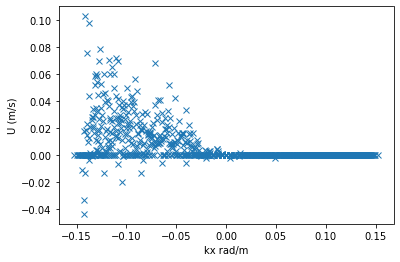

In [83]:
# Calcul du courant suivant les deux composantes X et Y

UX=U*kxs2/kn
VY=U*kys2/kn

# print(np.shape(UX))
# print(np.shape(VY))
avg_UX=np.average(UX)
avg_VY=np.average(VY)

med_UX=np.median(UX)
med_VY=np.median(VY)

# print('Moyenne UX',avg_UX)
# print('Moyenne VY',avg_VY)

# print('Median UX',med_UX)
# print('Median VY',med_VY)

UX_flat=UX.flatten()
VY_flat=VY.flatten()

kxs_norm=(kxs2/kn).flatten()
kys_norm=(kys2/kn).flatten()


# Moyenne sur une gamme de longueur d'onde
k_min_fit = 35 # in cpk
k_max_fit = 45 # in cpk
std_max=60*d2r
id_fit = np.where((angstd.flatten()  < std_max)  & (kncpk.flatten() >= k_min_fit) & (kncpk.flatten() <= k_max_fit) )[0]  # & phase > 0


UX_fit=UX_flat[id_fit]
VY_fit=VY_flat[id_fit]
Kx_fit=kxs_norm[id_fit]
Ky_fit=kys_norm[id_fit]
# Fonction pour calculer la moyenne en excluant les zéros
def moyenne_sans_zero(liste):
    # Filtrer les zéros
    liste_sans_zero = [x for x in liste if x != 0]
    
    # Vérifier si la liste n'est pas vide
    if not liste_sans_zero:
        return 0  # ou retourner None si vous préférez indiquer qu'il n'y a pas de moyenne

    # Calculer la moyenne
    moyenne = sum(liste_sans_zero) / len(liste_sans_zero)
    return moyenne


U_test=moyenne_sans_zero(UX_fit)

avg_Ufit=np.average(UX_fit)
med_Ufit=np.median(UX_fit)
avg_Vfit=np.average(VY_fit)
med_Vfit=np.median(VY_fit)

print('Moyenne UX',avg_Ufit)
print('Moyenne VY',avg_Vfit)

print('Median UX',med_Ufit)
print('Median VY',med_Vfit)

plt.plot(Kx_fit,UX_fit,'x')
plt.xlabel('kx rad/m')
plt.ylabel('U (m/s)')
print(U_test)

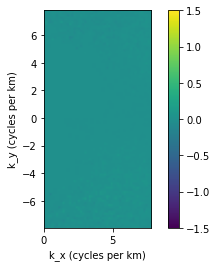

In [84]:
# plt.imshow(UX, extent=[kxs.min()/(2*np.pi)*1000, kxs.max()/(2*np.pi)*1000, 
#                       kys.min()/(2*np.pi)*1000, kys.max()/(2*np.pi)*1000],
#            aspect='equal', cmap=plt.cm.viridis, origin='lower')
# plt.colorbar()
# plt.clim(-curmax, curmax)

# # Définir les limites de l'axe des abscisses pour ne montrer que la moitié positive
# plt.xlim(0, kxs.max()/(2*np.pi)*1000)

# plt.xlabel('k_x (cycles per km)')
# plt.ylabel('k_y (cycles per km)')

# plt.show()

plt.imshow(Cimgp.T, extent=[kxs.min()/(2*np.pi)*1000, kxs.max()/(2*np.pi)*1000, 
                            kys.min()/(2*np.pi)*1000, kys.max()/(2*np.pi)*1000],
           aspect='equal', cmap=plt.cm.viridis, origin='lower')
plt.colorbar()
plt.clim(-curmax, curmax)


plt.axis('equal')
plt.tick_params(labelsize=16)
plt.xlabel('k_x (cycles per km)')
plt.ylabel('k_y (cycles per km)')

plt.title('Current from phase shift')
plt.show()

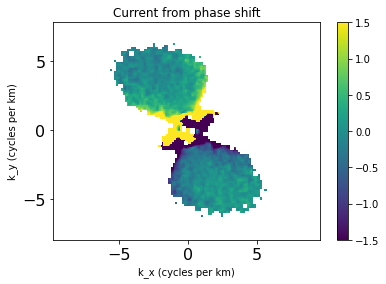

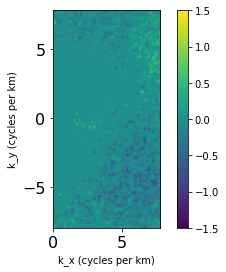

In [49]:
plt.figure(7)
plt.clf()
plt.gca().tick_params(labelsize=16)
plt.imshow(Cimgp.T, extent=[kxs.min()/(2*np.pi)*1000, kxs.max()/(2*np.pi)*1000, 
                            kys.min()/(2*np.pi)*1000, kys.max()/(2*np.pi)*1000],
           aspect='equal', cmap=plt.cm.viridis, origin='lower')
plt.colorbar()
plt.clim(-curmax, curmax)


plt.axis('equal')
plt.tick_params(labelsize=16)
plt.xlabel('k_x (cycles per km)')
plt.ylabel('k_y (cycles per km)')

plt.title('Current from phase shift')
plt.show()

plt.figure(8)
plt.clf()
plt.gca().tick_params(labelsize=16)

# Affichage de l'image avec les axes correctement étiquetés et l'aspect égal
plt.imshow(U, extent=[kxs.min()/(2*np.pi)*1000, kxs.max()/(2*np.pi)*1000, 
                      kys.min()/(2*np.pi)*1000, kys.max()/(2*np.pi)*1000],
           aspect='equal', cmap=plt.cm.viridis, origin='lower')
plt.colorbar()
plt.clim(-curmax, curmax)

# Définir les limites de l'axe des abscisses pour ne montrer que la moitié positive
plt.xlim(0, kxs.max()/(2*np.pi)*1000)

plt.xlabel('k_x (cycles per km)')
plt.ylabel('k_y (cycles per km)')

plt.show()



### Plot 1


U shape: (100, 100)
Up shape: (100, 100)
J4 shape: (2, 2058)
Sample indices of non-NaN values: [[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [0 7]
 [0 8]
 [0 9]]


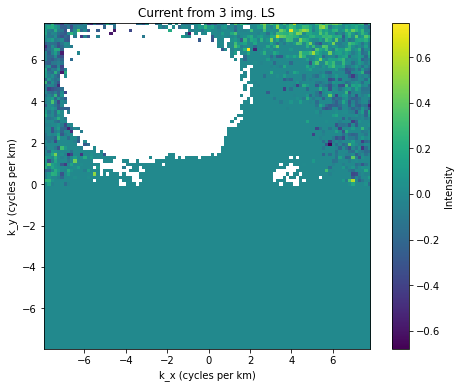

In [87]:
# Préparation des données
Up = np.copy(U)
Up[J4] = np.nan  # Remplacement par NaN

print('U shape:', np.shape(U))
print('Up shape:', np.shape(Up))
print('J4 shape:', np.shape(J4))

# Vérifiez les indices et les valeurs NaN
# print('Indices in J4 (sample):', J4[:10])
# print('NaNs in Up:', np.isnan(Up).sum())
# print('Min and Max values in Up:', np.nanmin(Up), np.nanmax(Up))
# print('kxs range:', kxs.min(), kxs.max())
# print('kys range:', kys.min(), kys.max())

# Trouver les indices des éléments non-NaN
not_nan_indices = np.argwhere(~np.isnan(Up))
print("Sample indices of non-NaN values:", not_nan_indices[:10])

# ... (les autres parties de votre code restent inchangées)

# Création de la figure
plt.figure(figsize=(8, 6))
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_facecolor('white')

# Normalisation et affichage de l'image
norm = Normalize(vmin=np.nanmin(Up), vmax=np.nanmax(Up))
plt.imshow(Up.T, extent=[kxs2.min()/(2*np.pi)*1000, kxs2.max()/(2*np.pi)*1000, 
                            kys2.min()/(2*np.pi)*1000, kys2.max()/(2*np.pi)*1000],
           aspect='equal', cmap=plt.cm.viridis, origin='lower')
plt.colorbar(label='Intensity')

# Configuration des axes
plt.xlabel('k_x (cycles per km)')
plt.ylabel('k_y (cycles per km)')
plt.title('Current from 3 img. LS')

# Affichage
plt.show()


In [20]:
# # Linear dispersion: theoretical phase seppd with no current
# dispt=np.sqrt(9.81/kn[J])
# dispt2=np.sqrt(9.81/kn[J2])

# print('dt=',dt)
# Cimg=(ang31[J])/kn[J]/dt
# Cimg2=(ang31[J2])/kn[J2]/dt

# # Conversion des unités et calculs
# kn_J2 = kn[J2] / (2 * np.pi) * 1000
# kn_J = kn[J] / (2 * np.pi) * 1000

dt= -1.0104237560859402


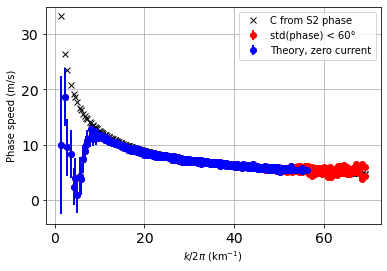

In [21]:
# # Création de la figure
# plt.figure(12)
# plt.clf()
# plt.gca().set_aspect('auto', adjustable='box')

# # Ajout des barres d'erreur
# e1 = plt.errorbar(kn_J2, np.abs(Cimg2), yerr=Cstd[J2] / ntile, fmt='ro', linewidth=2)
# e2 = plt.errorbar(kn_J, np.abs(Cimg), yerr=Cstd[J] / ntile, fmt='bo', linewidth=2)

# # Ajout des points théoriques
# plt.plot(kn_J2, dispt2, 'kx', linewidth=3)

# # Configuration des axes
# # plt.axis([8, kN, 4, 14])
# # plt.gca().set_xticks(np.linspace(0, 50, 6))
# plt.gca().tick_params(axis='both', which='major', labelsize=14)
# plt.xlabel(r'$k / 2 \pi$ (km$^{-1}$)')
# plt.ylabel('Phase speed (m/s)')

# # Légende
# plt.legend(['C from S2 phase', 'std(phase) < 60°', 'Theory, zero current'])

# # Grille
# plt.grid(True)

# # Affichage
# plt.show()

## 2-images method

U and V components of current : [-0.56445569  0.16468985]
U and V components of current : [-0.35100606  0.10809546]
uncertainties for U and V: 0.024482473099102797 0.014815543585566037


/tmp/ipykernel_112918/3627140284.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  X=np.linalg.lstsq(A, Y, rcond='warn')


Text(0.5, 1.0, 'selected spectral components for fit')

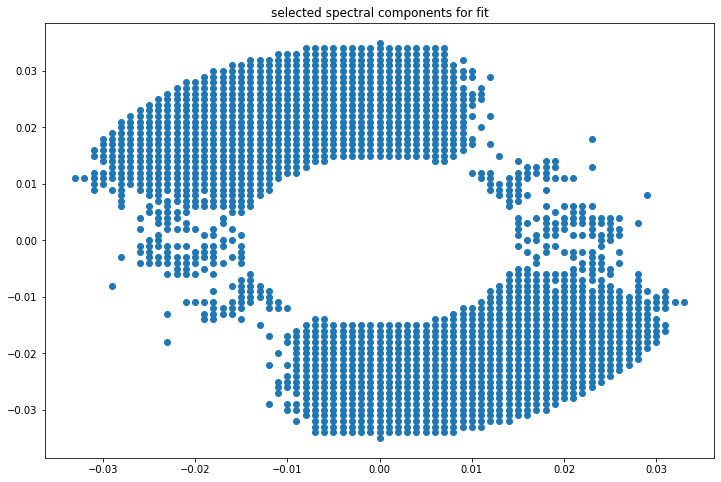

In [18]:
d2r=np.pi/180
k_min_fit=15
k_max_fit=35

std_max=60*d2r
phase_o = abs(dt) * np.sqrt(9.81 * kn)  # phase from linear theory (deep water)
phase_diff=ang31-phase_o*np.sign(ang31)# phase_diff should be equal to kx.Ux + ky.Uy ...

id_fit=id_fit = np.where((angstd.flatten()  < std_max)  & (kncpk.flatten() >= k_min_fit) & (kncpk.flatten() <= k_max_fit) )[0]  # & phase > 0

angstd1=angstd.flatten()
phase_diff1=phase_diff.flatten()
weight = ntile**2 / (angstd1[id_fit] ** 2)/dt**2
kx1=kxs2.flatten()
ky1=kys2.flatten()
K_x_fit = kx1[id_fit]
K_y_fit = ky1[id_fit]
Y = phase_diff1[id_fit] / dt
C=np.diag(weight)
A=(np.column_stack((K_x_fit ,K_y_fit)))*(2*np.pi)  # these are now in rad / m 

X=np.linalg.lstsq(A, Y, rcond='warn')
print('U and V components of current :',X[0])

# Pondération 

ATC=np.matmul(A.T,C)
D=np.matmul(ATC,A)
#print('A:',A)
DI=np.linalg.inv(D)
X=np.matmul(DI,np.matmul(ATC,Y))
print('U and V components of current :',X)


sigU=np.sqrt(abs(DI))
print('uncertainties for U and V:',sigU[0,0],sigU[1,1])

# X1=np.linalg.lstsq(A2[0,:,:],Y,rcond=None)[0]
# X2=np.linalg.lstsq(A2[1,:,:],Y,rcond=None)[0]



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter(K_x_fit, K_y_fit)
ax.set_title('selected spectral components for fit')
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(K_x_fit, K_y_fit, Y)
